In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date

from pydataset import data
from math import sqrt
from scipy import stats

In [3]:
# Has the network latency gone up since we switched internet service providers?

# No: The network latency is the same between both providers.
# Na: The network latency has increased since switching providers.

# True positive: Network latency has increased and we conclude that it has increased.
# True negative: Network latency is the same and we conclude that it is the same.
# False positive (Type I): Network latency has not increased but we conclude that it has increased.
# False negative (Type II): Network latency has increased but we conclude that it has not increased.

In [4]:
# Is the website redesign any good?

# No: Traffic to the website has remained the same since the redesign.
# Na: Traffic to the website has changed since the redesign.

# True positive: Traffic to the website has changed and we conclude that it has changed.
# True negative: Traffic to the website has remained the same and we conclude that it has remained the same.
# False positive (Type I): Traffic to the website has remained the same but we conclude that it has changed.
# False negative (Type II): Traffic to the website has changed but we conclude that there was no change.

In [5]:
# Is our television ad driving more sales?

# No: The television ad has resulted in no change in sales.
# Na: The television ad has resulted in an increase in sales.

# True positive: The television ad has increased sales and we conclude that it has increased sales.
# True negative: The television as has resulted in no change in sales and we conclude that no change in sales has 
#                occurred
# False positive (Type I): The television ad has not changed sales but we conclude that it has increased sales.
# False negative (Type II): The television as has increased sales but we conclude that it has not changed sales.

In [6]:
# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.
# A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
# A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
# Use a .05 level of significance.

xbar1 = 90
xbar2 = 100

n1 = 40
n2 = 50

s1 = 15
s2 = 20

t, p = stats.ttest_ind_from_stats(xbar1, s1, n1, xbar2, s2, n2)

In [7]:
confidence_level = .95
a = 1 - confidence_level

In [8]:
t

-2.6252287036468456

In [9]:
p

0.01020985244923939

In [10]:
if p < a:
    print("We reject the null hypothesis that weekend and weekday tips are the same")
else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support the claim that the tip levels are different")

We reject the null hypothesis that weekend and weekday tips are the same


In [11]:
mpg = data('mpg')

In [12]:
mpg['avg_mpg'] = (mpg.hwy + mpg.cty)/2
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [13]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
ninety_nine = mpg[mpg.year == 1999]
oh_eight = mpg[mpg.year == 2008]

In [14]:
t, p = stats.ttest_ind(ninety_nine.avg_mpg, oh_eight.avg_mpg)

In [15]:
t

0.21960177245940962

In [16]:
p

0.8263744040323578

In [17]:
# Null Hypothesis = There is no difference in the average mileage between cars in 1999 and 2008
# Alternative hypothesis = There is a difference in the mileage between cars in 1999 and 2008

if p < a:
    print("We reject the null hypothesis there is no difference in the average mileage between cars in 1999 and 2008")
    print("We move forward w/ the alternative hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


In [18]:
# Are compact cars more fuel-efficient than the average car?

compact = mpg[mpg['class'] == "compact"]

In [19]:
t, p = stats.ttest_1samp(compact.avg_mpg, mpg.avg_mpg.mean())

In [20]:
# Are compact cars more fuel-efficient than the average car?
# We reject the null hypothesis that compact cars get the same gas mileage as the average car.

p

4.1985637943171336e-10

In [21]:
# Null Hypothesis = There is no difference in the average mileage between cars in 1999 and 2008
# Alternative hypothesis = There is a difference in the mileage between cars in 1999 and 2008

if p/2 < a and t > 0:
    print("We reject the null hypothesis there is no difference in the average mileage between cars in 1999 and 2008")
    print("We move forward w/ the alternative hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis there is no difference in the average mileage between cars in 1999 and 2008
We move forward w/ the alternative hypothesis


In [22]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [23]:
mpg["a_or_m"] = mpg.trans.str[0]

In [24]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg,a_or_m
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,a
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,m
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,m
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,a
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,a
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,m
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,a
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,m


In [25]:
# Do manual cars get better gas mileage than automatic cars?
# Null hypothesis = there is no difference in the fuel efficiency of manual and automatic cars
# Alternative hypothesis = manual cars get better gas mileage than automatic cars
manual = mpg[mpg.a_or_m == "m"]
auto = mpg[mpg.a_or_m == "a"]

In [26]:
t, p = stats.ttest_ind(manual.avg_mpg, auto.avg_mpg)

In [27]:
if (p/2) < a and t > 0:
    print("Reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Reject the null hypothesis


In [28]:
telco = pd.read_csv("Cust_Churn_Telco.csv")

In [29]:
telco.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


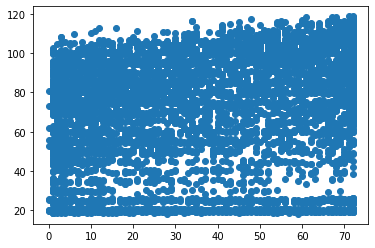

In [30]:
# Does tenure correlate with monthly charges?

x = telco.tenure
y = telco.MonthlyCharges

plt.scatter(x, y)


In [31]:
corr, p = stats.pearsonr(x, y)

In [32]:
# Does tenure correlate with monthly charges?
# not strongly


corr

0.24789985628615002

In [33]:
p

4.0940449915016345e-99

In [34]:
# Total charges? 
telco = telco.dropna(axis = 0)

In [35]:
z = telco.TotalCharges
i = telco.tenure

In [36]:
corr, p = stats.pearsonr(i, z)

In [37]:
# Total charges?
# Yes

corr

0.825880460933202

In [38]:
p

0.0

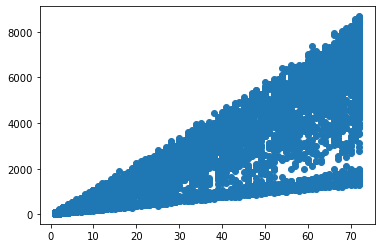

In [39]:
plt.scatter(i, z)

In [40]:
# What happens if you control for phone and internet service?
phone = telco[(telco.PhoneService == "Yes") & (telco.InternetService == "No")]

In [41]:
x = phone.tenure
y = phone.TotalCharges

In [42]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.9814648859044286, 0.0)

In [43]:
# controlling for phone, the correlation between tenure and monthly charges is very strong

In [44]:
# internet service?

internet = telco[(telco.PhoneService == 'Yes')&(telco.InternetService != 'No')]

In [45]:
x = internet.tenure
y = internet.TotalCharges

In [46]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.957922977802919, 0.0)

In [47]:
# Is there a relationship between how long an employee has been with the company and their salary?
from env import host, user, password

def get_db_url(db, host = host, user = user, password = password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [48]:
numbahz = pd.read_sql('SELECT * FROM employees JOIN salaries ON (employees.emp_no = salaries.emp_no) WHERE to_date > CURDATE()', get_db_url('employees'))

In [49]:
numbahz.head(20)

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,10002,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,10003,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10005,94692,2001-09-09,9999-01-01
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,10006,59755,2001-08-02,9999-01-01
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10,10007,88070,2002-02-07,9999-01-01
7,10009,1952-04-19,Sumant,Peac,F,1985-02-18,10009,94409,2002-02-14,9999-01-01
8,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24,10010,80324,2001-11-23,9999-01-01
9,10012,1960-10-04,Patricio,Bridgland,M,1992-12-18,10012,54423,2001-12-16,9999-01-01


In [50]:
numbahz["time_here"] = (date.today() - numbahz['hire_date']).dt.days

In [51]:
numbahz

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,salary,from_date,to_date,time_here
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,88958,2002-06-22,9999-01-01,12656
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,10002,72527,2001-08-02,9999-01-01,12873
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,10003,43311,2001-12-01,9999-01-01,12593
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,74057,2001-11-27,9999-01-01,12498
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10005,94692,2001-09-09,9999-01-01,11482
...,...,...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,499995,52868,2002-06-01,9999-01-01,10264
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,499996,69501,2002-05-12,9999-01-01,11102
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,499997,83441,2001-08-26,9999-01-01,12722
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,499998,55003,2001-12-25,9999-01-01,9990


In [52]:
# Is there a relationship between how long an employee has been with the company and their salary?
# a weak correlation

x = numbahz.time_here
y = numbahz.salary
corr, p = stats.pearsonr(x, y)
corr, p

(0.30646256131860783, 0.0)

In [86]:
# Is there a relationship between how long an employee has been with the company 
# and the number of titles they have had?

titles = pd.read_sql('SELECT * FROM titles', get_db_url('employees'))
titles

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [87]:
countref = titles.groupby('emp_no').count()[['title']].rename(columns={'title': 'titlecount'})

In [89]:
titlesnstuff = pd.merge(titles, countref, how='left', on='emp_no')

In [92]:
titlesnstuff['time_here'] = (date.today() - titlesnstuff['from_date']).dt.days
titlesnstuff

,emp_no,title,from_date,to_date,titlecount,time_here
0,10001,Senior Engineer,1986-06-26,9999-01-01,1,12656
1,10002,Staff,1996-08-03,9999-01-01,1,8965
2,10003,Senior Engineer,1995-12-03,9999-01-01,1,9209
3,10004,Engineer,1986-12-01,1995-12-01,2,12498
4,10004,Senior Engineer,1995-12-01,9999-01-01,2,9211
...,...,...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29,2,12226
443304,499997,Senior Engineer,1992-08-29,9999-01-01,2,10400
443305,499998,Senior Staff,1998-12-27,9999-01-01,2,8089
443306,499998,Staff,1993-12-27,1998-12-27,2,9915


In [93]:
x = titlesnstuff.time_here
y = titlesnstuff.titlecount
corr, p = stats.pearsonr(x, y)
corr, p

(0.07658055230442137, 0.0)

In [78]:
# Choose another 2 categorical variables from the mpg dataset and perform a chi^2
# contingency table test with them. Be sure to state your null and alternative hypotheses.
mpg


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg,a_or_m
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,a
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,m
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,m
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,a
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,a
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,m
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,a
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,m


In [84]:
woo = pd.crosstab(mpg.cyl, mpg.model)
woo

model,4runner 4wd,a4,a4 quattro,a6 quattro,altima,c1500 suburban 2wd,camry,camry solara,caravan 2wd,civic,...,mustang,navigator 2wd,new beetle,passat,pathfinder 4wd,ram 1500 pickup 4wd,range rover,sonata,tiburon,toyota tacoma 4wd
cyl,,,,,,,,,,,,,,,,,,,,,
4,2,4,4,0,4,0,4,4,1,9,...,0,0,4,4,0,0,0,4,4,3
5,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
6,3,3,4,2,2,0,3,3,10,0,...,4,0,0,3,3,0,0,3,3,4
8,1,0,0,1,0,5,0,0,0,0,...,5,3,0,0,1,10,4,0,0,0


In [85]:
alpha = .05
chi2, p, degf, expected = stats.chi2_contingency(woo)
chi2, p, degf, expected

(317.3636073455935,
 9.16652463540342e-22,
 111,
 array([[2.07692308, 2.42307692, 2.76923077, 1.03846154, 2.07692308,
         1.73076923, 2.42307692, 2.42307692, 3.80769231, 3.11538462,
         1.73076923, 1.73076923, 3.11538462, 2.42307692, 1.03846154,
         2.07692308, 2.42307692, 2.07692308, 2.76923077, 1.73076923,
         1.73076923, 2.76923077, 3.11538462, 1.38461538, 0.69230769,
         1.73076923, 1.03846154, 1.38461538, 3.11538462, 1.03846154,
         2.07692308, 2.42307692, 1.38461538, 3.46153846, 1.38461538,
         2.42307692, 2.42307692, 2.42307692],
        [0.1025641 , 0.11965812, 0.13675214, 0.05128205, 0.1025641 ,
         0.08547009, 0.11965812, 0.11965812, 0.18803419, 0.15384615,
         0.08547009, 0.08547009, 0.15384615, 0.11965812, 0.05128205,
         0.1025641 , 0.11965812, 0.1025641 , 0.13675214, 0.08547009,
         0.08547009, 0.13675214, 0.15384615, 0.06837607, 0.03418803,
         0.08547009, 0.05128205, 0.06837607, 0.15384615, 0.05128205,
        

In [86]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


In [88]:
woot = pd.crosstab(mpg.a_or_m, mpg.year)
woot

year,1999,2008
a_or_m,,
a,74,83
m,43,34


In [89]:
alpha = .05
chi2, p, degf, expected = stats.chi2_contingency(woot)
chi2, p, degf, expected

(1.2388121432707422,
 0.2657001056392438,
 1,
 array([[78.5, 78.5],
        [38.5, 38.5]]))

In [90]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

we fail to reject the null


In [97]:
# Is an employee's gender independent of whether an employee works in sales or marketing?
# (only look at current employees)
gend_dept = pd.read_sql('SELECT * FROM employees JOIN dept_emp ON (employees.emp_no = dept_emp.emp_no) WHERE to_date > CURDATE()', get_db_url('employees'))

In [98]:
gend_dept = gend_dept[(gend_dept.dept_no == "d007") | (gend_dept.dept_no == "d001")]

In [105]:
gend_dept["dept_no"] = gend_dept.dept_no.replace("d007", "Sales")

In [107]:
gend_dept["dept_no"] = gend_dept.dept_no.replace("d001", "Marketing")

In [110]:
gend_dept_info = pd.crosstab(gend_dept.gender, gend_dept.dept_no)
gend_dept_info

dept_no,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [111]:
alpha = .05
chi2, p, degf, expected = stats.chi2_contingency(gend_dept_info)
chi2, p, degf, expected

(0.3240332004060638,
 0.5691938610810126,
 1,
 array([[ 5893.2426013, 14969.7573987],
        [ 8948.7573987, 22731.2426013]]))

In [112]:
# Is an employee's gender independent of whether an employee works in sales or marketing?
# Yes

if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

we fail to reject the null


In [190]:
# Is an employee's gender independent of whether or not they are or have been a manager?
gend_man = pd.read_sql('SELECT * FROM employees LEFT JOIN dept_manager ON (employees.emp_no = dept_manager.emp_no)', get_db_url('employees'))
gend_man

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,dept_no,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,NaN,None,None,None
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,NaN,None,None,None
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,NaN,None,None,None
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,NaN,None,None,None
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,NaN,None,None,None
...,...,...,...,...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,NaN,None,None,None
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27,NaN,None,None,None
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,NaN,None,None,None
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,NaN,None,None,None


In [191]:
gend_man = gend_man.rename(columns = {"dept_no": "managers"}).fillna(0)

In [198]:
gend_man.iloc[100000]

emp_no            110022
birth_date    1956-09-12
first_name     Margareta
last_name     Markovitch
gender                 M
hire_date     1985-01-01
emp_no            110022
managers               1
from_date     1985-01-01
to_date       1991-10-01
Name: 100000, dtype: object

In [196]:
gend_man['managers'] = gend_man['managers'].apply(lambda x: x if x == 0 else 1)

In [197]:
gend_man

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,managers,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,0.0,0,0,0
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,0.0,0,0,0
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,0.0,0,0,0
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,0.0,0,0,0
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,0.0,0,0,0
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27,0.0,0,0,0
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,0.0,0,0,0
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,0.0,0,0,0


In [200]:
observed = pd.crosstab(gend_man['gender'], gend_man['managers'])

In [201]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(1.4566857643547197,
 0.22745818732810363,
 1,
 array([[1.20041397e+05, 9.60331174e+00],
        [1.79958603e+05, 1.43966883e+01]]))